In [107]:
# Install required libraries
!pip install xgboost

In [108]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
import random

In [109]:
df = pd.read_csv('onlinefraud.csv')

In [110]:
print(df.shape)
print(df.head(5))

(6362620, 11)
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [111]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [112]:
df = df.dropna()  # Remove rows with missing values


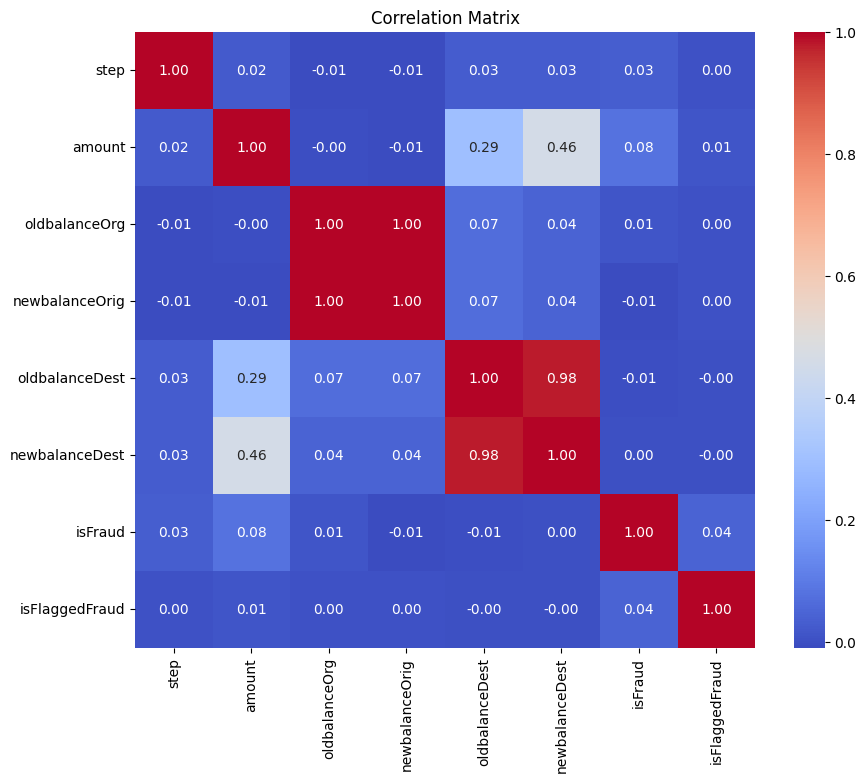

In [114]:
# Create a correlation matrix
correlation_matrix = df.corr(numeric_only=True)  # To calculate correlation only for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [115]:
# Feature selection and splitting
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Exclude non-numeric columns from the training and testing data
non_numeric_columns = ['nameOrig', 'nameDest', 'type']
X_train = X_train.drop(columns=non_numeric_columns)
X_test = X_test.drop(columns=non_numeric_columns)

In [118]:
# Create an XGBoost classifier
model = xgb.XGBClassifier()

In [119]:
# Train the model on the training data
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [121]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9996605172083198


In [122]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.79      0.86      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



Text(0.5, 1.0, 'Confusion Matrix')

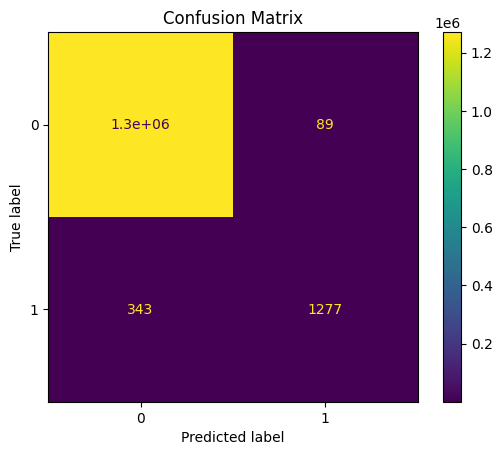

In [123]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')

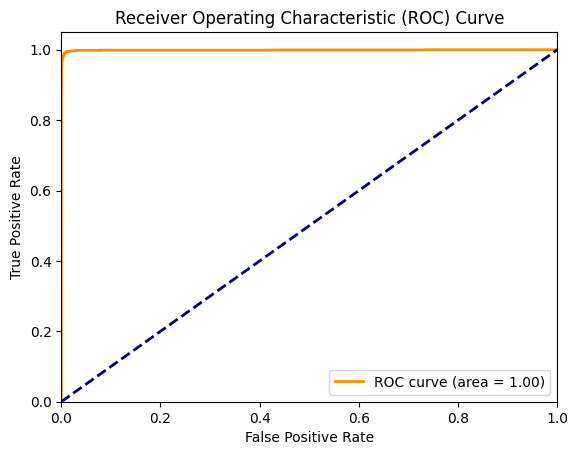

In [124]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [125]:
# Collect user input
user_input = {
    'step': int(input("Enter the step: ")),
    'amount': float(input("Enter the transaction amount: ")),
    'oldbalanceOrg': float(input("Enter the old balance of the origin account: ")),
    'newbalanceOrig': float(input("Enter the new balance of the origin account: ")),
    'oldbalanceDest': float(input("Enter the old balance of the destination account: ")),
    'newbalanceDest': float(input("Enter the new balance of the destination account: ")),
    'isFlaggedFraud': df['isFlaggedFraud'].values[0]  # Extract from your dataset
}

# Create a DataFrame from user input
user_df = pd.DataFrame([user_input])

# Make predictions using the model
user_predictions = model.predict(user_df)

# Check if the user input resulted in fraud or not
if user_predictions[0] == 1:
    print("The transaction is predicted as fraud.")
else:
    print("The transaction is predicted as non-fraud.")



Enter the step: 1
Enter the transaction amount: 10000
Enter the old balance of the origin account: 30000
Enter the new balance of the origin account: 0
Enter the old balance of the destination account: 3000
Enter the new balance of the destination account: 33000
The transaction is predicted as fraud.


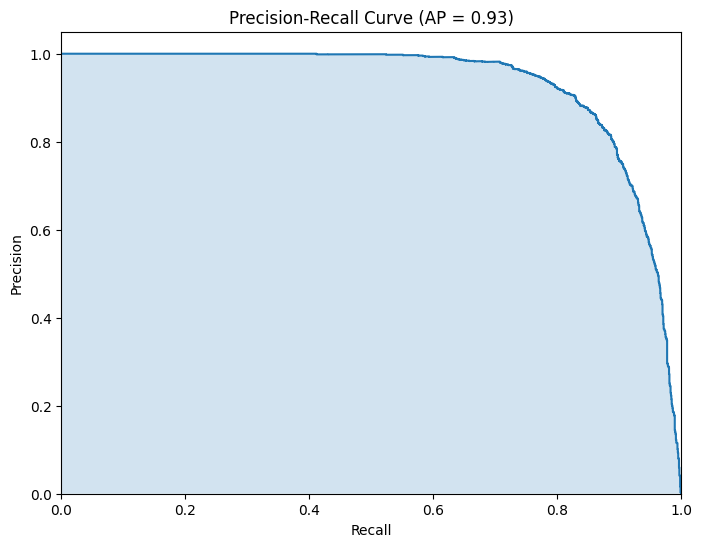

In [126]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision and Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.show()
